<a href="https://colab.research.google.com/github/comejohn59-dotcom/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITANIC DATASET ANALYSIS AND MACHINE LEARNING PIPELINE
Dataset loaded successfully!
Dataset shape: (909, 12)
DATA EXPLORATION

1. Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB
None

2. Statistical Summary:
       PassengerId    Survived         Age       SibSp       Parch    

Traceback (most recent call last):
  File "/tmp/ipython-input-2329998692.py", line 363, in main
    create_visualizations(df_processed)
  File "/tmp/ipython-input-2329998692.py", line 325, in create_visualizations
    axes[1,1].bar(['Male', 'Female'], sex_survival.values, color=['blue', 'pink'])
  File "/usr/local/lib/python3.12/dist-packages/matplotlib/__init__.py", line 1521, in inner
    return func(
           ^^^^^
  File "/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py", line 2572, in bar
    x, height, width, y, linewidth, hatch = np.broadcast_arrays(
                                            ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/numpy/lib/_stride_tricks_impl.py", line 551, in broadcast_arrays
    shape = _broadcast_shape(*args)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/numpy/lib/_stride_tricks_impl.py", line 431, in _broadcast_shape
    b = np.broadcast(*args[:32])
        ^^^^^^^^^^^^^^

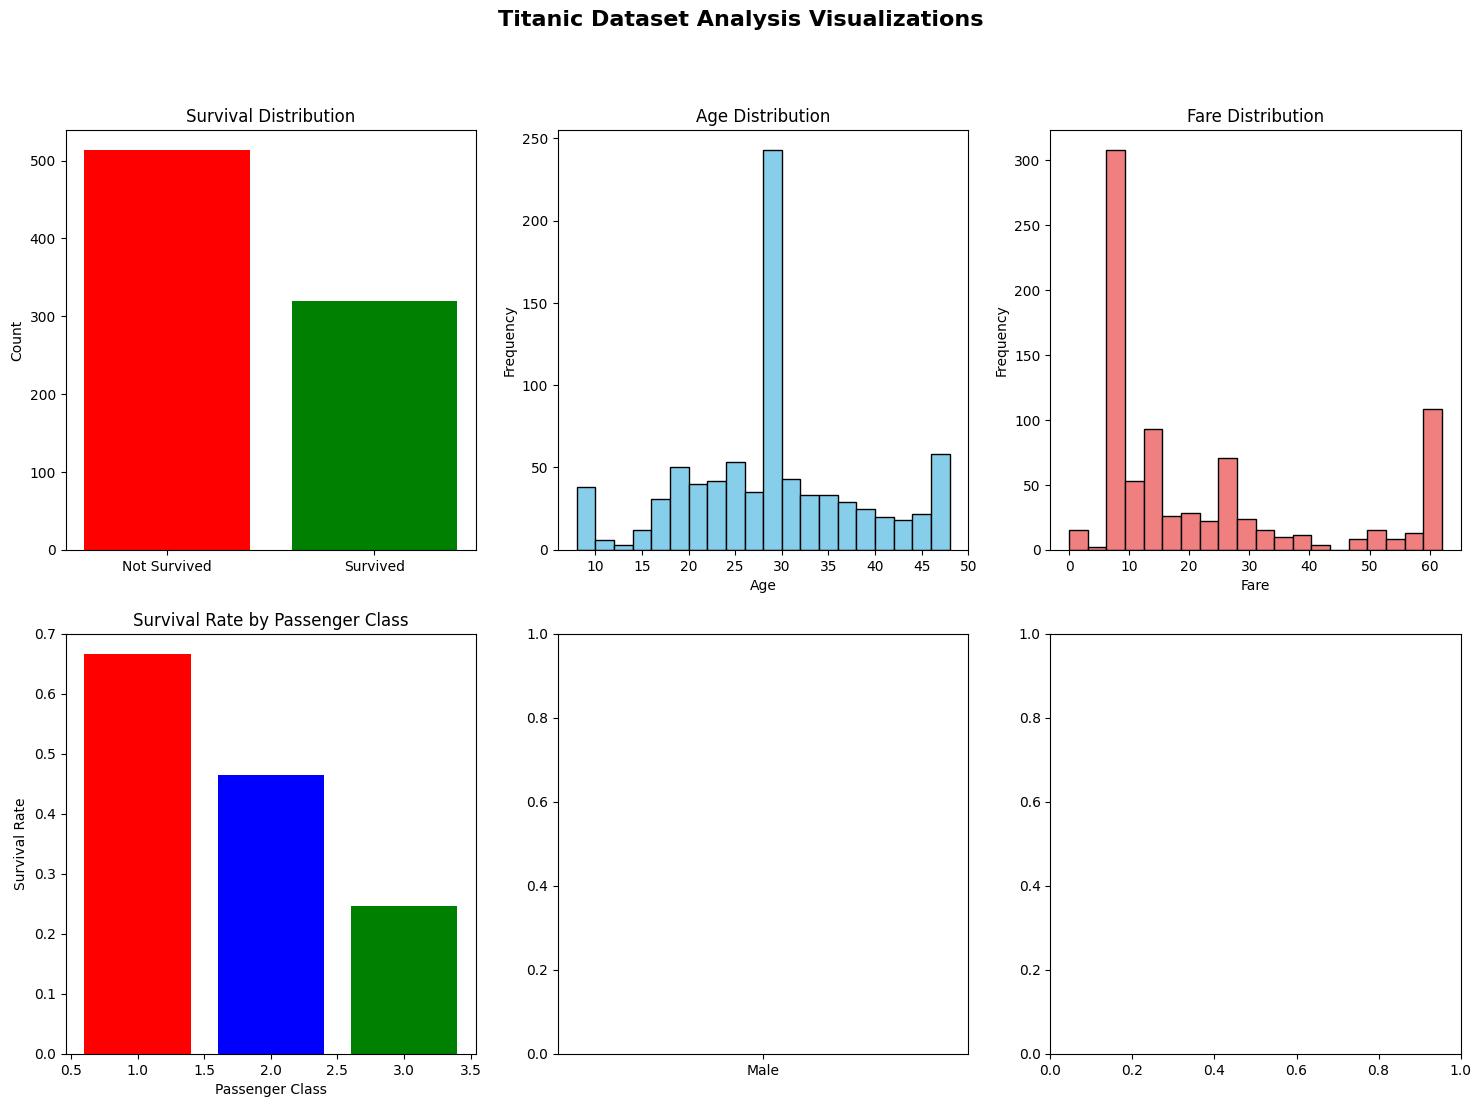

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
def load_data():
    """Load Titanic dataset from the provided URL"""
    url = 'https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv'
    df = pd.read_csv(url)
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    return df

# Data Exploration
def explore_data(df):
    """Perform initial data exploration"""
    print("="*50)
    print("DATA EXPLORATION")
    print("="*50)

    # Basic info
    print("\n1. Dataset Info:")
    print(df.info())

    # Statistical summary
    print("\n2. Statistical Summary:")
    print(df.describe())

    # Check for missing values
    print("\n3. Missing Values:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    return missing_values

# Data Preprocessing
def preprocess_data(df):
    """Perform data preprocessing steps"""
    print("\n" + "="*50)
    print("DATA PREPROCESSING")
    print("="*50)

    # Create a copy for backup
    df_processed = df.copy()

    # 1. Drop Cabin column (too many missing values)
    print("\n1. Dropping 'Cabin' column (too many missing values)")
    df_processed.drop(columns=['Cabin'], inplace=True)

    # 2. Handle missing values
    print("\n2. Handling missing values:")

    # Fill Age with mean
    age_mean = df_processed['Age'].mean()
    df_processed['Age'] = df_processed['Age'].fillna(age_mean)
    print(f"   - Age: Filled {df_processed['Age'].isnull().sum()} missing values with mean: {age_mean:.2f}")

    # Fill Embarked with mode
    embarked_mode = df_processed['Embarked'].mode()[0]
    df_processed['Embarked'] = df_processed['Embarked'].fillna(embarked_mode)
    print(f"   - Embarked: Filled {df_processed['Embarked'].isnull().sum()} missing values with mode: {embarked_mode}")

    # Fill Fare with mode
    fare_mode = df_processed['Fare'].mode()[0]
    df_processed['Fare'] = df_processed['Fare'].fillna(fare_mode)
    print(f"   - Fare: Filled {df_processed['Fare'].isnull().sum()} missing values with mode: {fare_mode:.2f}")

    # 3. Handle outliers in Age using IQR
    print("\n3. Handling outliers in Age:")
    Q1 = df_processed['Age'].quantile(0.25)
    Q3 = df_processed['Age'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"   - Age IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")

    # Remove outliers
    initial_shape = df_processed.shape[0]
    df_processed = df_processed[(df_processed['Age'] >= lower_bound) & (df_processed['Age'] <= upper_bound)]
    final_shape = df_processed.shape[0]
    print(f"   - Removed {initial_shape - final_shape} outliers from Age")

    # 4. Remove duplicates
    print("\n4. Handling duplicate rows:")
    duplicates = df_processed.duplicated().sum()
    print(f"   - Found {duplicates} duplicate rows")
    df_processed = df_processed.drop_duplicates()
    print(f"   - Removed duplicates, new shape: {df_processed.shape}")

    # 5. Data cleaning and standardization
    print("\n5. Data cleaning and standardization:")

    # Standardize Sex column
    df_processed['Sex'] = df_processed['Sex'].replace('male', 'Male')
    df_processed['Sex'] = df_processed['Sex'].replace('female', 'Female')
    print("   - Standardized Sex column values")

    # Clean Embarked values
    df_processed['Embarked'] = df_processed['Embarked'].replace(['s','S'], 'southampton')
    print("   - Cleaned Embarked column values")

    # 6. Feature Engineering - Extract Title from Name
    print("\n6. Feature Engineering - Extracting Title from Name:")
    df_processed['Title'] = df_processed['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

    # Map titles to numerical values
    title_map = {
        'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Dr': 5,
        'Rev': 6, 'Col': 7, 'Major': 8, 'Mlle': 2, 'Countess': 3,
        'Mme': 3, 'Don': 1, 'Lady': 3, 'Sir': 1, 'Jonkheer': 1, 'Capt': 7
    }
    df_processed['Title'] = df_processed['Title'].map(title_map).fillna(0)
    print("   - Extracted and encoded titles from names")

    # 7. Clean Pclass column
    print("\n7. Cleaning Pclass column:")
    df_processed['Pclass'] = df_processed['Pclass'].astype(str)
    df_processed['Pclass'] = df_processed['Pclass'].str.replace('st', '', regex=False)
    df_processed['Pclass'] = df_processed['Pclass'].str.replace('nd', '', regex=False)
    df_processed['Pclass'] = df_processed['Pclass'].str.replace('rd', '', regex=False)
    df_processed['Pclass'] = df_processed['Pclass'].str.strip()
    df_processed['Pclass'] = df_processed['Pclass'].astype(int)
    print("   - Cleaned and converted Pclass to integer")

    # 8. Handle outliers in numerical columns
    print("\n8. Handling outliers in numerical columns:")
    for col in ['Age', 'Fare']:
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Cap outliers instead of removing them
        df_processed[col] = np.where(df_processed[col] > upper, upper,
                                   np.where(df_processed[col] < lower, lower, df_processed[col]))
        print(f"   - Capped outliers in {col} using IQR method")

    print("\nPreprocessing completed successfully!")
    return df_processed

# Feature Engineering and Encoding
def prepare_features(df):
    """Prepare features for machine learning"""
    print("\n" + "="*50)
    print("FEATURE PREPARATION")
    print("="*50)

    # Encode categorical features
    label_encoder = LabelEncoder()
    df_encoded = df.copy()

    df_encoded['Sex'] = label_encoder.fit_transform(df_encoded['Sex'])
    df_encoded['Embarked'] = label_encoder.fit_transform(df_encoded['Embarked'])

    print("Encoded categorical features:")
    print(f"  - Sex: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

    # Select features for modeling
    features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Title']
    target = 'Survived'

    X = df_encoded[features]
    y = df_encoded[target]

    print(f"\nSelected features: {features}")
    print(f"Target variable: {target}")
    print(f"Feature matrix shape: {X.shape}")
    print(f"Target vector shape: {y.shape}")

    return X, y, features

# Data Splitting and Scaling
def split_and_scale_data(X, y):
    """Split data and scale features"""
    print("\n" + "="*50)
    print("DATA SPLITTING AND SCALING")
    print("="*50)

    # Split data: 70% train, 15% validation, 15% test
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    X_valid, X_test, y_valid, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42
    )

    print(f"Training set: {X_train.shape}")
    print(f"Validation set: {X_valid.shape}")
    print(f"Test set: {X_test.shape}")

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)

    print("Features scaled using StandardScaler")

    return X_train_scaled, X_valid_scaled, X_test_scaled, y_train, y_valid, y_test, scaler

# Model Training and Evaluation
def train_and_evaluate_model(X_train, X_test, y_train, y_test, scaler, features):
    """Train KNN model and evaluate performance"""
    print("\n" + "="*50)
    print("MODEL TRAINING AND EVALUATION")
    print("="*50)

    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    print("K-Nearest Neighbors model trained with n_neighbors=5")

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print("\nModel Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'])
    plt.title('Confusion Matrix - KNN Model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred,
                              target_names=['Not Survived', 'Survived']))

    return knn, accuracy, precision, recall, f1, roc_auc

# Prediction on new data
def predict_survival(model, scaler, features):
    """Predict survival for new passenger data"""
    print("\n" + "="*50)
    print("PREDICTION ON NEW DATA")
    print("="*50)

    # Example passenger data
    sample_passengers = [
        # Pclass, Sex, Age, Fare, SibSp, Parch, Title
        [2, 0, 30, 20.5, 1, 0, 1],  # Male, 2nd class
        [1, 1, 25, 100.0, 0, 0, 2],  # Female, 1st class
        [3, 0, 45, 7.5, 0, 2, 1]     # Male, 3rd class
    ]

    passenger_descriptions = [
        "2nd class Male, Age 30, Fare 20.5, 1 sibling, no parents",
        "1st class Female, Age 25, Fare 100.0, no siblings, no parents",
        "3rd class Male, Age 45, Fare 7.5, no siblings, 2 parents"
    ]

    for i, (passenger_data, description) in enumerate(zip(sample_passengers, passenger_descriptions)):
        sample_passenger = pd.DataFrame([passenger_data], columns=features)
        sample_passenger_scaled = scaler.transform(sample_passenger)
        predicted_survival = model.predict(sample_passenger_scaled)[0]

        survival_status = "Survived" if predicted_survival == 1 else "Not Survived"
        print(f"Passenger {i+1} ({description}): {survival_status}")

# Visualization Functions
def create_visualizations(df_processed):
    """Create comprehensive visualizations"""
    print("\n" + "="*50)
    print("DATA VISUALIZATIONS")
    print("="*50)

    # Set up the plotting style
    plt.style.use('default')
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Titanic Dataset Analysis Visualizations', fontsize=16, fontweight='bold')

    # 1. Survival count
    survival_counts = df_processed['Survived'].value_counts()
    axes[0,0].bar(['Not Survived', 'Survived'], survival_counts.values, color=['red', 'green'])
    axes[0,0].set_title('Survival Distribution')
    axes[0,0].set_ylabel('Count')

    # 2. Age distribution
    axes[0,1].hist(df_processed['Age'], bins=20, color='skyblue', edgecolor='black')
    axes[0,1].set_title('Age Distribution')
    axes[0,1].set_xlabel('Age')
    axes[0,1].set_ylabel('Frequency')

    # 3. Fare distribution
    axes[0,2].hist(df_processed['Fare'], bins=20, color='lightcoral', edgecolor='black')
    axes[0,2].set_title('Fare Distribution')
    axes[0,2].set_xlabel('Fare')
    axes[0,2].set_ylabel('Frequency')

    # 4. Survival by Pclass
    pclass_survival = df_processed.groupby('Pclass')['Survived'].mean()
    axes[1,0].bar(pclass_survival.index, pclass_survival.values, color=['red', 'blue', 'green'])
    axes[1,0].set_title('Survival Rate by Passenger Class')
    axes[1,0].set_xlabel('Passenger Class')
    axes[1,0].set_ylabel('Survival Rate')

    # 5. Survival by Sex
    sex_survival = df_processed.groupby('Sex')['Survived'].mean()
    axes[1,1].bar(['Male', 'Female'], sex_survival.values, color=['blue', 'pink'])
    axes[1,1].set_title('Survival Rate by Gender')
    axes[1,1].set_ylabel('Survival Rate')

    # 6. Box plot of Age after outlier handling
    axes[1,2].boxplot(df_processed['Age'])
    axes[1,2].set_title('Age Distribution (After Outlier Handling)')
    axes[1,2].set_ylabel('Age')

    plt.tight_layout()
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    numerical_df = df_processed[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title']]
    correlation_matrix = numerical_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Heatmap')
    plt.tight_layout()
    plt.show()

# Main execution function
def main():
    """Main function to execute the complete Titanic data analysis pipeline"""
    print("TITANIC DATASET ANALYSIS AND MACHINE LEARNING PIPELINE")
    print("="*60)

    try:
        # Step 1: Load data
        df = load_data()

        # Step 2: Explore data
        missing_values = explore_data(df)

        # Step 3: Preprocess data
        df_processed = preprocess_data(df)

        # Step 4: Create visualizations
        create_visualizations(df_processed)

        # Step 5: Prepare features
        X, y, features = prepare_features(df_processed)

        # Step 6: Split and scale data
        X_train, X_valid, X_test, y_train, y_valid, y_test, scaler = split_and_scale_data(X, y)

        # Step 7: Train and evaluate model
        model, accuracy, precision, recall, f1, roc_auc = train_and_evaluate_model(
            X_train, X_test, y_train, y_test, scaler, features
        )

        # Step 8: Make predictions on new data
        predict_survival(model, scaler, features)

        # Final summary
        print("\n" + "="*60)
        print("PIPELINE EXECUTION COMPLETED SUCCESSFULLY!")
        print("="*60)
        print(f"Final Model Performance:")
        print(f"  - Accuracy: {accuracy:.4f}")
        print(f"  - Precision: {precision:.4f}")
        print(f"  - Recall: {recall:.4f}")
        print(f"  - F1-Score: {f1:.4f}")
        print(f"  - ROC-AUC: {roc_auc:.4f}")
        print(f"\nDataset processed: {df_processed.shape[0]} samples")
        print(f"Features used: {len(features)}")

    except Exception as e:
        print(f"Error occurred during execution: {str(e)}")
        import traceback
        traceback.print_exc()

# Run the main function
if __name__ == "__main__":
    main()

TITANIC DATASET - DATA LOADING AND EXPLORATION
Dataset loaded successfully!
Dataset shape: (909, 12)
DATA EXPLORATION

1. Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB
None

2. Statistical Summary:
       PassengerId    Survived         Age       SibSp       Parch        Fare

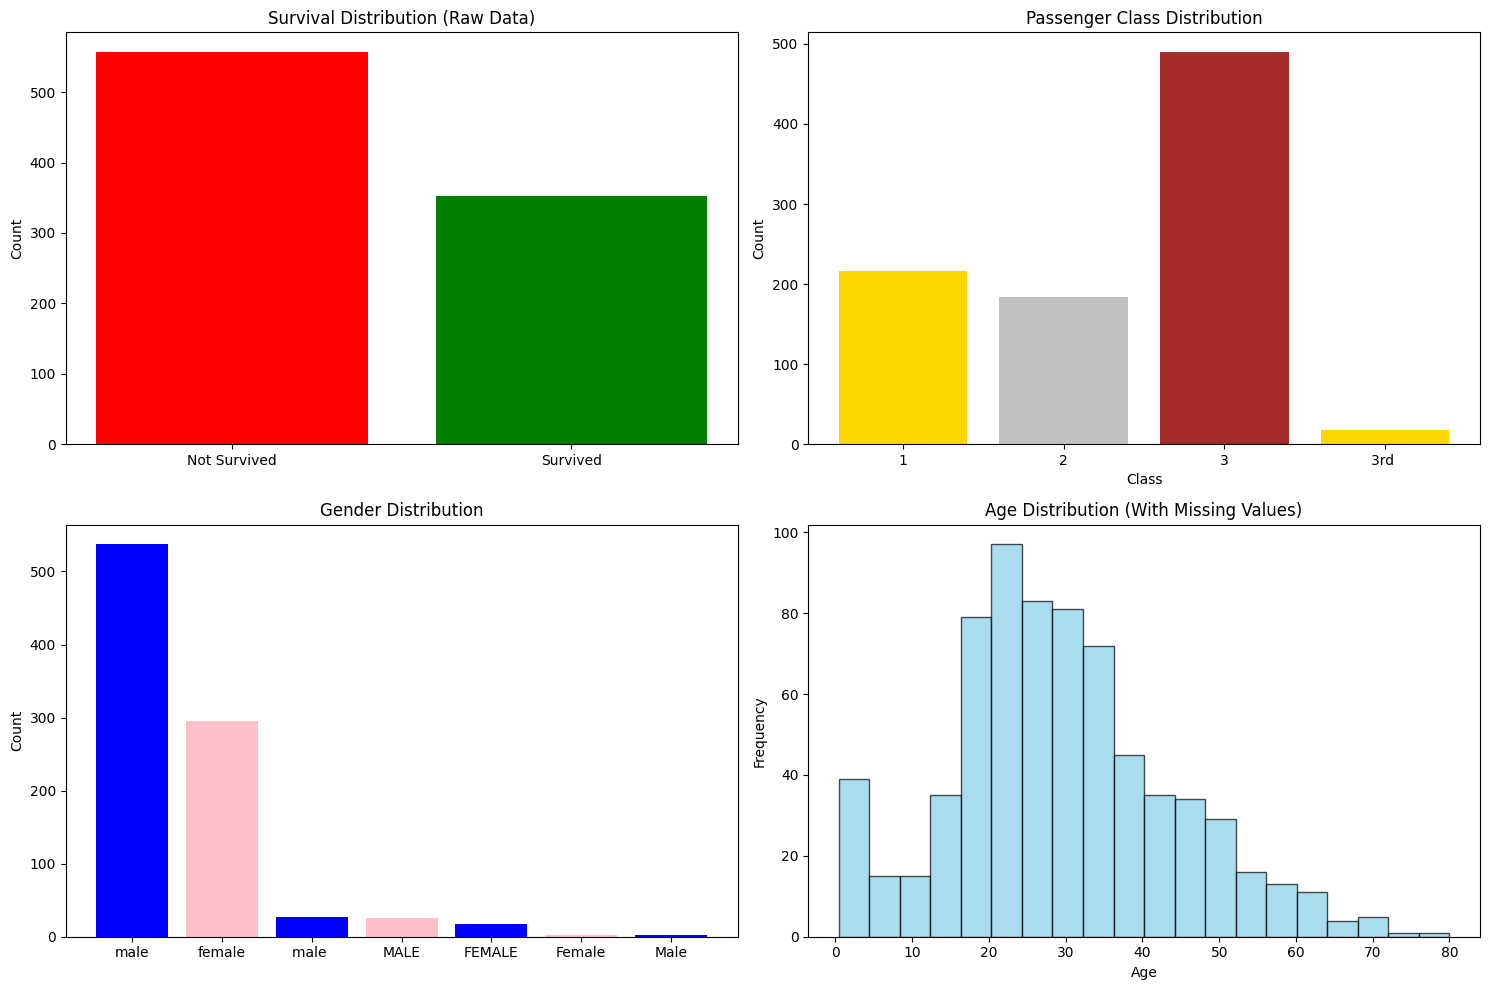

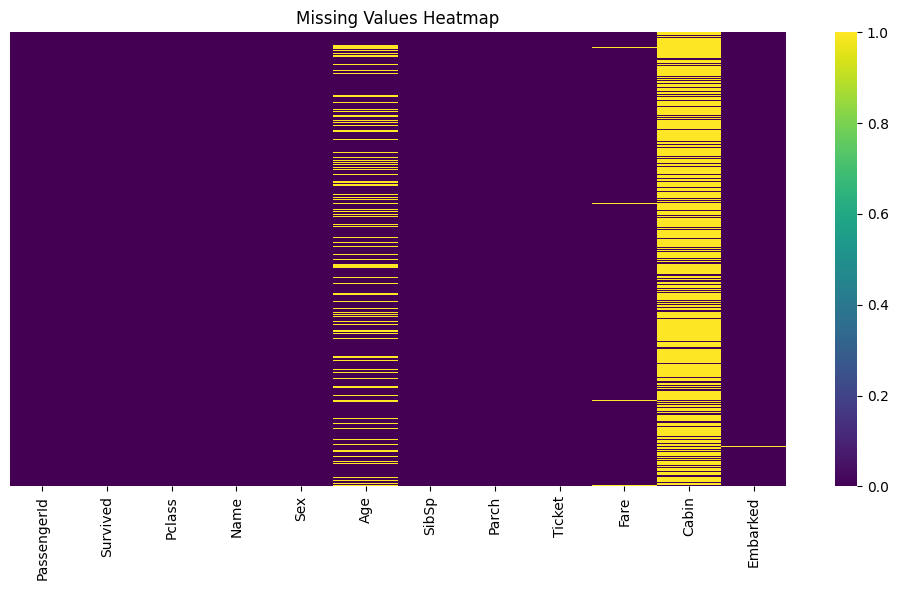


Raw data saved as 'titanic_raw_data.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_data():
    """Load Titanic dataset from the provided URL"""
    url = 'https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv'
    df = pd.read_csv(url)
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    return df

def explore_data(df):
    """Perform initial data exploration"""
    print("="*50)
    print("DATA EXPLORATION")
    print("="*50)

    # Basic info
    print("\n1. Dataset Info:")
    print(df.info())

    # Statistical summary
    print("\n2. Statistical Summary:")
    print(df.describe())

    # Check for missing values
    print("\n3. Missing Values:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    # Data types
    print("\n4. Data Types:")
    print(df.dtypes)

    return missing_values

def initial_visualizations(df):
    """Create initial visualizations of raw data"""
    print("\n5. Initial Visualizations:")

    # Set up the plotting style
    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Survival count
    survival_counts = df['Survived'].value_counts()
    axes[0,0].bar(['Not Survived', 'Survived'], survival_counts.values, color=['red', 'green'])
    axes[0,0].set_title('Survival Distribution (Raw Data)')
    axes[0,0].set_ylabel('Count')

    # Pclass distribution
    pclass_counts = df['Pclass'].value_counts().sort_index()
    axes[0,1].bar(pclass_counts.index, pclass_counts.values, color=['gold', 'silver', 'brown'])
    axes[0,1].set_title('Passenger Class Distribution')
    axes[0,1].set_xlabel('Class')
    axes[0,1].set_ylabel('Count')

    # Gender distribution
    gender_counts = df['Sex'].value_counts()
    axes[1,0].bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
    axes[1,0].set_title('Gender Distribution')
    axes[1,0].set_ylabel('Count')

    # Age distribution (with missing values)
    axes[1,1].hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[1,1].set_title('Age Distribution (With Missing Values)')
    axes[1,1].set_xlabel('Age')
    axes[1,1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Missing values heatmap
    plt.figure(figsize=(10, 6))
    missing_matrix = df.isnull()
    sns.heatmap(missing_matrix, cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.show()

def main():
    """Main function for data loading and exploration"""
    print("TITANIC DATASET - DATA LOADING AND EXPLORATION")
    print("="*60)

    # Load data
    df = load_data()

    # Explore data
    missing_values = explore_data(df)

    # Create initial visualizations
    initial_visualizations(df)

    # Save raw data for next steps
    df.to_csv('titanic_raw_data.csv', index=False)
    print("\nRaw data saved as 'titanic_raw_data.csv'")

    return df

if __name__ == "__main__":
    df = main()

TITANIC DATASET - DATA PREPROCESSING
Data loaded successfully from previous step!
Initial dataset shape: (909, 12)

1. Handling Missing Values:
   - Dropping 'Cabin' column (too many missing values)
   - Age: Filled missing values with mean: 29.60
   - Embarked: Filled missing values with mode: S
   - Fare: Filled missing values with mode: 8.05

2. Handling Outliers:
   - Age: Removed 65 outliers using IQR method
     Bounds: [2.50, 54.50]
   - Fare: Capped outliers using IQR method
     Bounds: [-24.92, 62.59]

3. Data Cleaning and Standardization:
   - Removed 10 duplicate rows
   - Standardized Sex column values
   - Cleaned Embarked column values

4. Feature Engineering:
   - Extracted and encoded titles from names
   - Cleaned and converted Pclass to integer

Final dataset shape: (834, 12)

Missing values after preprocessing:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare

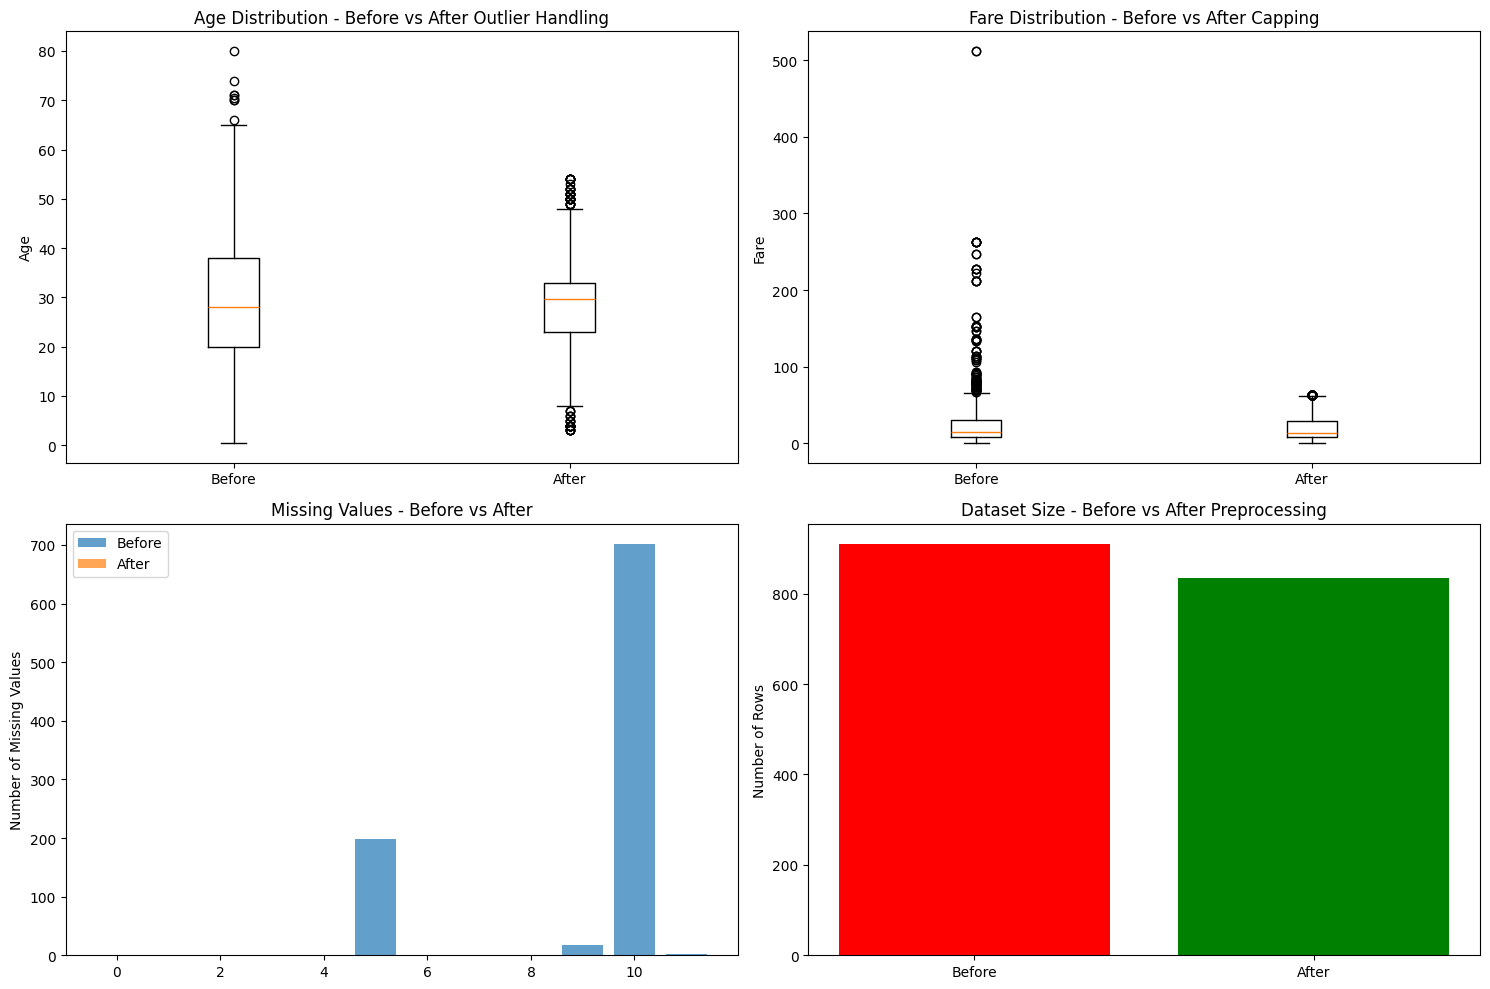


Processed data saved as 'titanic_processed_data.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_processed_data():
    """Load data from previous step"""
    try:
        df = pd.read_csv('titanic_raw_data.csv')
        print("Data loaded successfully from previous step!")
        return df
    except FileNotFoundError:
        print("Raw data file not found. Please run 01_data_loading_exploration.py first.")
        return None

def handle_missing_values(df):
    """Handle missing values in the dataset"""
    print("\n1. Handling Missing Values:")

    df_processed = df.copy()

    # Drop Cabin column (too many missing values)
    print("   - Dropping 'Cabin' column (too many missing values)")
    df_processed.drop(columns=['Cabin'], inplace=True)

    # Fill Age with mean
    age_mean = df_processed['Age'].mean()
    df_processed['Age'] = df_processed['Age'].fillna(age_mean)
    print(f"   - Age: Filled missing values with mean: {age_mean:.2f}")

    # Fill Embarked with mode
    embarked_mode = df_processed['Embarked'].mode()[0]
    df_processed['Embarked'] = df_processed['Embarked'].fillna(embarked_mode)
    print(f"   - Embarked: Filled missing values with mode: {embarked_mode}")

    # Fill Fare with mode
    fare_mode = df_processed['Fare'].mode()[0]
    df_processed['Fare'] = df_processed['Fare'].fillna(fare_mode)
    print(f"   - Fare: Filled missing values with mode: {fare_mode:.2f}")

    return df_processed

def handle_outliers(df):
    """Handle outliers in numerical columns"""
    print("\n2. Handling Outliers:")

    df_processed = df.copy()

    # Handle Age outliers using IQR
    Q1_age = df_processed['Age'].quantile(0.25)
    Q3_age = df_processed['Age'].quantile(0.75)
    IQR_age = Q3_age - Q1_age
    lower_bound_age = Q1_age - 1.5 * IQR_age
    upper_bound_age = Q3_age + 1.5 * IQR_age

    initial_shape = df_processed.shape[0]
    df_processed = df_processed[(df_processed['Age'] >= lower_bound_age) & (df_processed['Age'] <= upper_bound_age)]
    final_shape = df_processed.shape[0]

    print(f"   - Age: Removed {initial_shape - final_shape} outliers using IQR method")
    print(f"     Bounds: [{lower_bound_age:.2f}, {upper_bound_age:.2f}]")

    # Handle Fare outliers by capping
    Q1_fare = df_processed['Fare'].quantile(0.25)
    Q3_fare = df_processed['Fare'].quantile(0.75)
    IQR_fare = Q3_fare - Q1_fare
    lower_fare = Q1_fare - 1.5 * IQR_fare
    upper_fare = Q3_fare + 1.5 * IQR_fare

    df_processed['Fare'] = np.where(df_processed['Fare'] > upper_fare, upper_fare,
                                  np.where(df_processed['Fare'] < lower_fare, lower_fare, df_processed['Fare']))

    print(f"   - Fare: Capped outliers using IQR method")
    print(f"     Bounds: [{lower_fare:.2f}, {upper_fare:.2f}]")

    return df_processed

def clean_and_standardize_data(df):
    """Clean and standardize categorical data"""
    print("\n3. Data Cleaning and Standardization:")

    df_processed = df.copy()

    # Remove duplicates
    duplicates = df_processed.duplicated().sum()
    df_processed = df_processed.drop_duplicates()
    print(f"   - Removed {duplicates} duplicate rows")

    # Standardize Sex column
    df_processed['Sex'] = df_processed['Sex'].replace('male', 'Male')
    df_processed['Sex'] = df_processed['Sex'].replace('female', 'Female')
    print("   - Standardized Sex column values")

    # Clean Embarked values
    df_processed['Embarked'] = df_processed['Embarked'].replace(['s','S'], 'southampton')
    print("   - Cleaned Embarked column values")

    return df_processed

def feature_engineering(df):
    """Create new features and transform existing ones"""
    print("\n4. Feature Engineering:")

    df_processed = df.copy()

    # Extract Title from Name
    df_processed['Title'] = df_processed['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

    # Map titles to numerical values
    title_map = {
        'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Dr': 5,
        'Rev': 6, 'Col': 7, 'Major': 8, 'Mlle': 2, 'Countess': 3,
        'Mme': 3, 'Don': 1, 'Lady': 3, 'Sir': 1, 'Jonkheer': 1, 'Capt': 7
    }
    df_processed['Title'] = df_processed['Title'].map(title_map).fillna(0)
    print("   - Extracted and encoded titles from names")

    # Clean Pclass column
    df_processed['Pclass'] = df_processed['Pclass'].astype(str)
    df_processed['Pclass'] = df_processed['Pclass'].str.replace('st', '', regex=False)
    df_processed['Pclass'] = df_processed['Pclass'].str.replace('nd', '', regex=False)
    df_processed['Pclass'] = df_processed['Pclass'].str.replace('rd', '', regex=False)
    df_processed['Pclass'] = df_processed['Pclass'].str.strip()
    df_processed['Pclass'] = df_processed['Pclass'].astype(int)
    print("   - Cleaned and converted Pclass to integer")

    return df_processed

def visualize_preprocessing_results(df_before, df_after):
    """Visualize the effects of preprocessing"""
    print("\n5. Preprocessing Results Visualization:")

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Age before and after outlier handling
    axes[0,0].boxplot([df_before['Age'].dropna(), df_after['Age']], labels=['Before', 'After'])
    axes[0,0].set_title('Age Distribution - Before vs After Outlier Handling')
    axes[0,0].set_ylabel('Age')

    # Fare before and after capping
    axes[0,1].boxplot([df_before['Fare'].dropna(), df_after['Fare']], labels=['Before', 'After'])
    axes[0,1].set_title('Fare Distribution - Before vs After Capping')
    axes[0,1].set_ylabel('Fare')

    # Missing values comparison
    missing_before = df_before.isnull().sum()
    missing_after = df_after.isnull().sum()

    axes[1,0].bar(range(len(missing_before)), missing_before.values, alpha=0.7, label='Before')
    axes[1,0].bar(range(len(missing_after)), missing_after.values, alpha=0.7, label='After')
    axes[1,0].set_title('Missing Values - Before vs After')
    axes[1,0].set_ylabel('Number of Missing Values')
    axes[1,0].legend()

    # Dataset size comparison
    sizes = [df_before.shape[0], df_after.shape[0]]
    axes[1,1].bar(['Before', 'After'], sizes, color=['red', 'green'])
    axes[1,1].set_title('Dataset Size - Before vs After Preprocessing')
    axes[1,1].set_ylabel('Number of Rows')

    plt.tight_layout()
    plt.show()

def main():
    """Main function for data preprocessing"""
    print("TITANIC DATASET - DATA PREPROCESSING")
    print("="*60)

    # Load data from previous step
    df_before = load_processed_data()
    if df_before is None:
        return

    print(f"Initial dataset shape: {df_before.shape}")

    # Step 1: Handle missing values
    df_step1 = handle_missing_values(df_before)

    # Step 2: Handle outliers
    df_step2 = handle_outliers(df_step1)

    # Step 3: Clean and standardize data
    df_step3 = clean_and_standardize_data(df_step2)

    # Step 4: Feature engineering
    df_final = feature_engineering(df_step3)

    print(f"\nFinal dataset shape: {df_final.shape}")
    print("\nMissing values after preprocessing:")
    print(df_final.isnull().sum())

    # Visualize results
    visualize_preprocessing_results(df_before, df_final)

    # Save processed data
    df_final.to_csv('titanic_processed_data.csv', index=False)
    print("\nProcessed data saved as 'titanic_processed_data.csv'")

    return df_final

if __name__ == "__main__":
    df_processed = main()